Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.8199887492968311
AUC of ROC curve: 0.675865230987299
AUC of precision recall curve: 0.4819609088919754


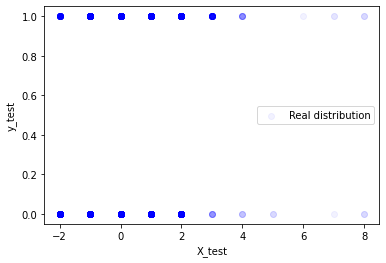

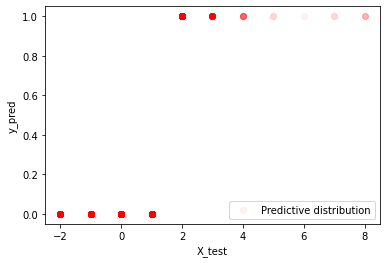

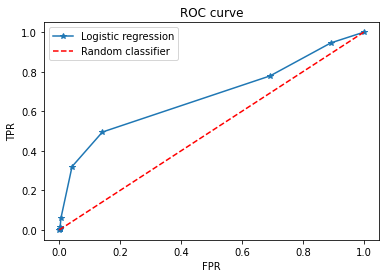

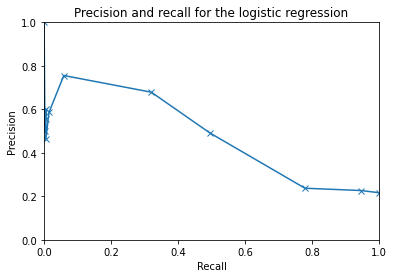

In [ ]:
#####################
##### Second HW #####
#####################

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

## Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData_Basic/Example_Codes/Data/Chapter_1_cleaned_data.csv')
X_train, X_test, y_train, y_test = train_test_split( df['PAY_1'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24) 

## Logistic Regression model
My_lr = LogisticRegression(C=0.1, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           max_iter=100, 
                           multi_class='auto', 
                           n_jobs=None, 
                           penalty='l2', 
                           random_state=None, 
                           solver='liblinear',
                           tol=0.0001, 
                           verbose=0, 
                           warm_start=False)
My_lr.fit(X_train, y_train)
y_pred = My_lr.predict(X_test)
is_correct = y_pred == y_test
print("Accuracy:",np.mean(is_correct))

## Plot Real distribution & Predictive distribution  
fig1 = plt.figure()
plt.scatter(X_test,y_test, color='blue', alpha=0.05)
plt.legend(['Real distribution'])
plt.xlabel('X_test')
plt.ylabel('y_test')
fig2 = plt.figure()
plt.scatter(X_test,y_pred, color='red', alpha=0.05)
plt.legend(['Predictive distribution'])
plt.xlabel('X_test')
plt.ylabel('y_pred')

## Obtaining Predicted Probabilities
y_pred_proba = My_lr.predict_proba(X_test) 
pos_proba = y_pred_proba[:,1] # positive probability

## Plot ROC curve & Calculate AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print("AUC of ROC curve:",metrics.roc_auc_score(y_test, pos_proba))
fig3 = plt.figure()
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random classifier'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with PAY_1 feature')

## Plot precision recall curve & Calculate AUC
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test, pos_proba)
print("AUC of precision recall curve:",metrics.auc(recall, precision))
fig4 = plt.figure()
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()